In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [2]:
data_dir = "flower_photos"
batch_size = 32
img_height = 180
img_width = 180

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2,  
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 5 classes: daisy, dandelion, roses, sunflowers, tulips
])

# Model compilation
model.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\koval\DataAnalysisLab3\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
epochs = 50
history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=validation_data
)

# Saving the model
model.save("flower_classification_model.h5")

c:\Users\koval\DataAnalysisLab3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step - accuracy: 0.3184 - loss: 1.5314

c:\Users\koval\DataAnalysisLab3\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 35s 372ms/step - accuracy: 0.3188 - loss: 1.5307 - val_accuracy: 0.4583 - val_loss: 1.3125
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 365ms/step - accuracy: 0.4318 - loss: 1.2999 - val_accuracy: 0.4295 - val_loss: 1.3116
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 362ms/step - accuracy: 0.4723 - loss: 1.2297 - val_accuracy: 0.5363 - val_loss: 1.1226
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 33s 362ms/step - accuracy: 0.5423 - loss: 1.1325 - val_accuracy: 0.5732 - val_loss: 1.0424
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 367ms/step - accuracy: 0.5622 - loss: 1.0671 - val_accuracy: 0.5787 - val_loss: 1.0088
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.5837 - loss: 1.0261 - val_accuracy: 0.6060 - val_loss: 0.9837
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 364ms/step - accuracy: 0.6130 - loss: 0.9978 - val_accuracy: 0.6183 - val_loss: 0.9637
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 34s 366ms/step - accuracy: 0.6432 - loss: 0.9227 - val_accuracy: 0.644

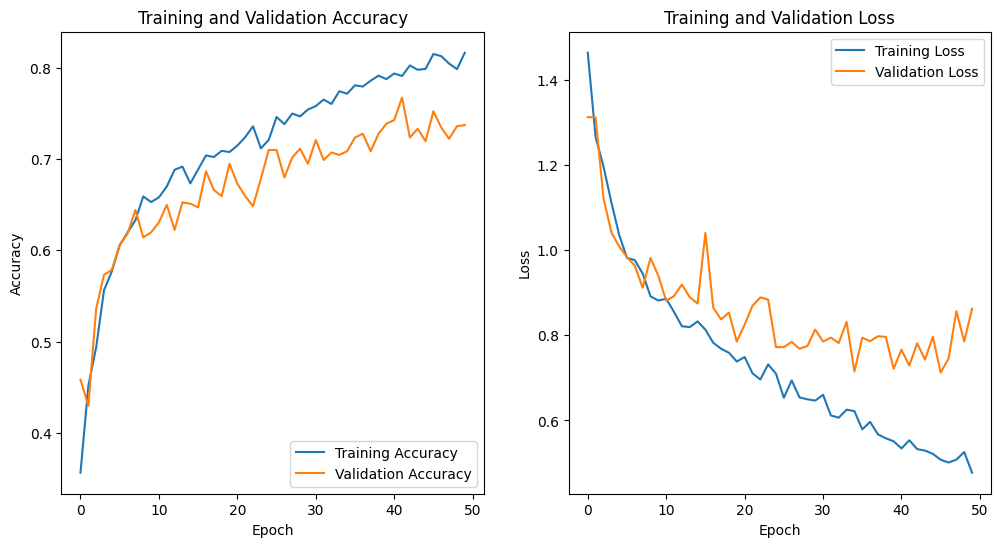

In [ ]:

# Plotting training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()